In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from kmodes.kprototypes import KPrototypes

In [69]:
dataframe = pd.read_csv('C:/Users/atirkey/OneDrive - Kmart Australia Limited/Downloads/Control.csv')

In [70]:
numerical_columns = ["AVERAGE_BASKET_SIZE", "NO_OF_TRANSACTIONS", "AVG_BASKET_DOLLARS", "TOTAL_SALES_UNITS", "TOTAL_SALES_DOLLARS"]
scaler = StandardScaler()
dataframe[numerical_columns] = scaler.fit_transform(dataframe[numerical_columns])

In [71]:
categorical_columns = ["STORE_TYPE", "AREA", "COUNTRY"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    dataframe[col] = le.fit_transform(dataframe[col])
    label_encoders[col] = le


In [72]:
geography_mapping = {
    "W.A": 1, "N.T": 2, "S.A": 3, "QLD": 4, 
    "NSW": 5, "VIC": 6, "ACT": 7, "TAS": 8, "NTH": 9, "STH": 10, "undefined": 11
}
dataframe["STATE"] = dataframe["STATE"].map(geography_mapping)
dataframe.fillna({"STATE": geography_mapping["undefined"]}, inplace=True)

In [73]:
X = dataframe[numerical_columns + ["STATE"] + categorical_columns].values

In [78]:
print(dataframe[categorical_columns].head())

   STORE_TYPE  AREA  COUNTRY
0           1     6        0
1           1     2        0
2           1     2        0
3           1     6        0
4           1     5        0


In [74]:
k_values = range(1, 11)
costs = []

In [79]:
for k in k_values:
    kproto = KPrototypes(n_clusters=k, init='random', random_state=42, n_init=10)
    kproto.fit(X, categorical=[len(numerical_columns) + i for i in range(len(categorical_columns))])
    costs.append(kproto.cost_)

ValueError: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.

ValueError: x and y must have same first dimension, but have shapes (10,) and (8,)

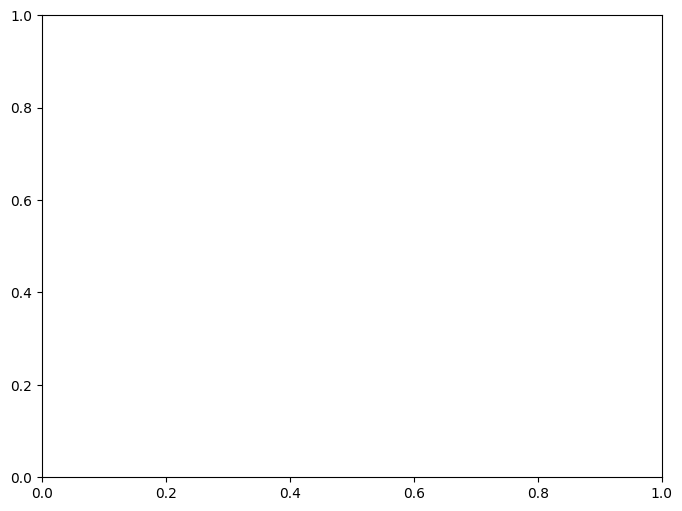

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, costs, marker='o', color='b')
plt.title('Elbow Method for Optimal k in K-Prototypes Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [ ]:
kproto = KPrototypes(n_clusters=5, init='Huang', random_state=42)
clusters = kproto.fit_predict(X, categorical=[len(numerical_columns) + i for i in range(len(categorical_columns))])

dataframe['Cluster'] = clusters

In [ ]:
dataframe.to_csv("StoreClustering1.csv", index=False)

In [64]:
cluster_profiles = dataframe.groupby('Cluster')[['STATE', 'COUNTRY', 'STORE_TYPE', 'AREA']].agg(lambda x: x.mode()[0])
cluster_profiles['Count'] = dataframe['Cluster'].value_counts()
print("Cluster Profiles:")
print(cluster_profiles)

Cluster Profiles:
         STATE  COUNTRY  STORE_TYPE  AREA  Count
Cluster                                         
0            1        0           1     7      4
1           11        0           0     4     90
2            5        0           1     2    184
3            5        0           1     7      2
4            5        0           1     3     81


In [47]:
print("Cluster Centroids:")
print(kproto.cluster_centroids_)
print("\nCluster Assignments:")
print(dataframe[["STORE", "Cluster"]])

Cluster Centroids:
[[ 1.1135945  -1.62894398  6.16564841 -1.58990807 -1.09890079  1.
   7.          0.        ]
 [-0.08660519 -1.35628069 -0.12407503 -1.40565574 -1.41774868  0.
   4.          0.        ]
 [-0.08732836  0.17646489 -0.12412406  0.19140479  0.18628469  1.
   2.          0.        ]
 [13.24162628 -1.62894398  9.69854058 -0.95102513 -0.77849783  1.
   7.          0.        ]
 [-0.08734254  1.22678254 -0.12412464  1.22903973  1.22559996  1.
   3.          0.        ]]

Cluster Assignments:
     STORE  Cluster
0     1074        2
1     1022        2
2     1275        2
3     1148        4
4     1104        2
..     ...      ...
356   3351        1
357   1111        2
358   1376        2
359   1350        2
360   1015        1

[361 rows x 2 columns]


In [48]:
print("\nCategorical Value Mappings:")
for col, le in label_encoders.items():
    print(f"{col}:")
    for class_, label in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {class_} -> {label}")



Categorical Value Mappings:
STORE_TYPE:
  K-HUB -> 0
  KMART -> 1
  undefined -> 2
AREA:
  Inner Metro -> 0
  Inner Regional -> 1
  Middle Metro -> 2
  Outer Metro -> 3
  Outer Regional -> 4
  Remote -> 5
  Satellite City/Regional City -> 6
  undefined -> 7
COUNTRY:
  AUSTRALIA -> 0
  NEW ZEALAND -> 1
  undefined -> 2
